## Eric He

## Numerical Analysis

## Assignment 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
sns.set_style('whitegrid')

# 1. 

Let $x_0=0,x_1=1,x_2=2$.
  Recall that the Hermite interpolation of a function $f$ at the
  points $x_0,x_1,x_2$ has the form
  $$p(x) = \sum_{j=0}^2H_j(x)f(x_j) + \sum_{j=0}^2K_j(x)f'(x_j).$$

## a)

Show that the polynomial $H_1(x)$ in this representation is
    given by  $$x^4 - 4x^3 + 4x^2.$$

### Answer

We first calculate the Lagrange interpolation polynomial $L_1$.

\begin{align}
L_1 &= \big(\dfrac{x - 0}{1 - 0}\big) \big(\dfrac{x - 2}{1 - 2}\big) \\
&= -(x)(x-2) \\
&= -x^2 + 2x 
\end{align}

The corresponding first order derivative $L_1' = -2x + 2$; at $x_1 = 1$ this corresponds to the value $0$.

Then $H_1$ follows the formula

\begin{align}
H_1 &= L_1^2 (1 - 2 L_1'(x - 1)) \\
&= (-x^2 + 2x)^2 \\
&= x^4 - 2x^3 - 2x^3 + 4x^2 \\
&= x^4 - 4x^3 + 4x^2 
\end{align}

## b)

Verify that the polynomial $K_1(x)$ in this representation is
    $$
    x^5 -5 x^4 + 8x^3 -4x^2.
    $$

### Answer

\begin{align}
&K_k = L_k^2(x - x_k) \\
&\implies K_1 = (-x^2 + 2x)^2(x-1) \\
&= (x^4 - 4x^3 + 4x^2)(x - 1) \\
&= x^5 - x^4 - 4x^4 + 4x^3 + 4x^3 - 4x^2 \\
&= x^5 - 5x^4 + 8x^3 - 4x^2 
\end{align}

## c)

Sketch $H_2(x)$ and $K_2(x)$ in the same graph without
    computing their exact form explicitly.

### Answer

$H_2$ has the property that it has the value $1$ at $x_2 = 2$ and $0$ at $x_0 = 0, x_1 = 1$. Additionally, it has the derivative take the value $0$ at the points $x_0 = 0, x_1 = 1, x_2 = 2$.

$K_2$ has the property that it has the value $0$ at $x_0 = 0, x_1 = 1, x_2 = 2$, and the first derivative taking value $1$ at $x_2 = 2$ and $0$ at $x_0 = 0, x_1 = 1$.

# 2.

Write codes to approximate integrals of the form
$$
I(f) = \int_a^bf(t)\,dt
$$
using the trapezoidal and Simpson's rule on the sub-intervals
$[x_{i-1},x_{i}]$, $i=1,\ldots,m$, where $x_i=a+ih$, $i=0,\ldots,m$
with $h=(b-a)/m$.

In [2]:
def equispace(a, b, m):
    step = (b - a) / m
    left_endpoints = (np.arange(m) * step) + a
    right_endpoints = left_endpoints + step
    return left_endpoints, right_endpoints

def trapezoidal(f, a, b, m):
    left, right = equispace(a, b, m)
    integral = 0
    for i in range(len(left)):
        length = right[i] - left[i]
        left_value = f(left[i])
        right_value = f(right[i])
        area = (left_value + right_value) * length / 2
        integral += area
    return integral    
    
def simpson(f, a, b, m):
    if m % 2 == 1:
        raise Exception('Number of subintervals m must be even')
    left, right = equispace(a, b, m)
    step = (b - a) / m
    factor = step / 3
    integral = 0
    for i in np.arange(len((left)) / 2, dtype='int'):
        left_value = f(left[2*i])
        mid_value = f(left[2*i] + step)
        right_value = f(left[2*i] + 2 * step)
        area = (left_value + 4 * mid_value + right_value)
        integral += area
    integral = integral * factor
    return integral

## a)

Hand in listings of your codes, and use them to
  approximate the integral 
$$
\int_{0.1}^1 \sqrt{x}\,dx.
$$ Compare the numerical errors $\mathcal E$ for both quadrature rules (the exact
value of the integral is $\frac{2}{3} - \frac{1}{15 \sqrt{10}}$). Try
different $m$ (e.g., $m=10,20,40,80,\ldots$) and plot the quadrature
errors versus $m$ in a double-logarithmic plot.

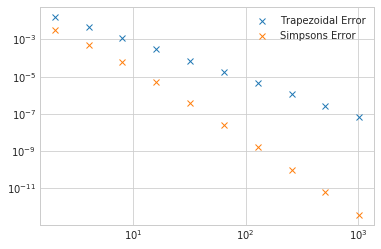

In [33]:
def f(x):
    return np.sqrt(x)

a = 0.1
b = 1
ms = 2 * 2 ** np.arange(10)
exact = 2 / 3 - (1 / (15 * np.sqrt(10)))

error_trap = []
error_simp = []
for m in ms:
    trap = trapezoidal(f, a, b, m)
    simp = simpson(f, a, b, m)
    
    error_trap.append(np.abs(trap - exact))
    error_simp.append(np.abs(simp - exact))

plt.plot(ms, error_trap, 'x', label='Trapezoidal Error')
plt.plot(ms, error_simp, 'x', label='Simpsons Error')
plt.xscale('log')
plt.yscale('log')
plt.legend()

## b)

To numerically study how the errors $\mathcal E$ decrease with
  $m$, we assume that the errors behaves like $Cm^\kappa$, with
  to-be-determined $C,\kappa\in \mathbb R$. Applying the logarithm to
  $\mathcal E = Cm^\kappa$ results in
  $$
  \log(\mathcal E) = D + \kappa\log(m),
  $$
  where $D=\log(C)$. Use the values for $m$ and $\log(\mathcal E)$ you
  computed in (a) to find the best-fitting values for $D$ and $\kappa$ by solving a least squares problem. Compare your
  findings for $\kappa$ with the theoretical estimates for the composite
  trapezoidal and Simpson's rules.

### Answer

The error bound for the composite trapezoidal rule is given by $\dfrac{(b - a)^3}{12m^2}M_2$, where $M_2$ is the maximum absolute value of the second derivative on $[a, b]$. 

Likewise, the error bound for the composite Simpson's rule is given by $\dfrac{(b-a)^5}{2880m^4}M_4$, where $m$ is the number of sub-intervals.

Given $f = \sqrt{x}$, we have

$f' = \frac{1}{2}x^{-1/2}$,

$f'' = \frac{-1}{4}x^{-3/2}$,

$f^{(3)} = \frac{3}{8}x^{-5/2}$,

$f^{(4)} = \frac{-15}{16}x^{-7/2}$

Given these, $M_2 = \frac{1}{4}$ and $M_4 = \frac{15}{16}$ on the interval $[0.1, 1]$.

Thus, the theoretical bound for the trapezoidal rule is $\dfrac{0.9^3}{48m^2}$, and the theoretical bound for Simpson's is $\dfrac{0.9^5}{2880m^4} \dfrac{15}{16}$.

Rewritten in the format $\log(E) = D + \kappa \log(m)$, we have $\kappa$ equal to the coefficients of $m$. For the trapezoidal rule, this is $-2$; for Simpson's rule, this is $-4$.

The empirical error is calculated below:

In [28]:
e_trap = np.log(error_trap)
e_simp = np.log(error_simp)

ones = np.ones_like(ms)

A = np.array([np.log(ms), ones]).T
# A = np.array([ones, np.log(ms)]).T

K_trap, _ = np.linalg.lstsq(A, e_trap, rcond=None)[0]
K_simp, _ = np.linalg.lstsq(A, e_simp, rcond=None)[0]

In [29]:
K_trap

-1.9835772307054929

In [30]:
K_simp

-3.7250524670879908

The empirical Kappas are not far below the theoretical bounds, with the trapezoidal rule having an empirical $\kappa$ of $-1.97$ relative to the bound of $-2$, and Simpson's having an empirical $\kappa$ of $-3.52$ with an empirical bound of $-4$.

# 3.

The upper row in the
  below figure shows a function $f$ together with a polynomial
  approximation. For three plots, the optimal best 2-norm fit for
  three different weights $w(x)$ is used, and one is the result of an
  Lagrange interpolation. Match the approximations in the upper row
  with the information (weight functions or interpolation points) in
  the lower row.

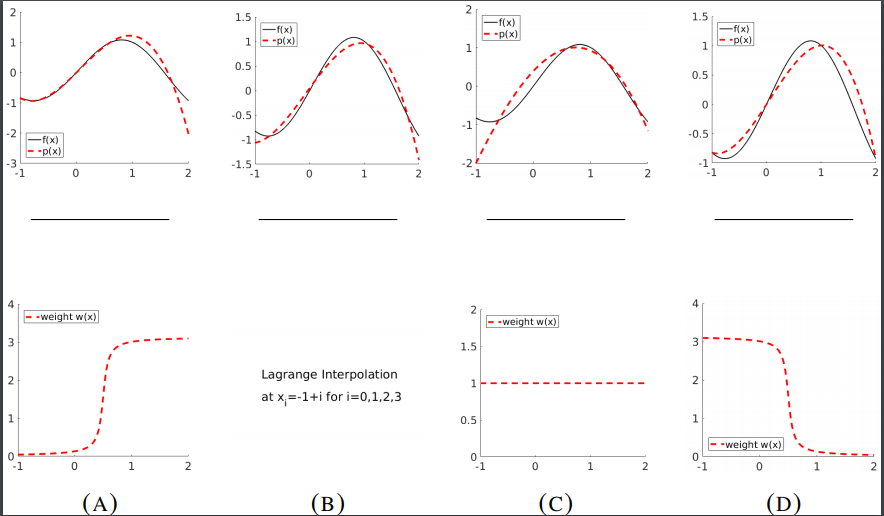

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image('num_anal_hw5_figure.png')

In the lower row, figure (A) greatly upweights a close fit towards the right side of the interval; this is given by figure 3 on the top row.

Figure (B) is a simple Lagrange interpolation seeking to match the point values at 4 different values of x; this corresponds to Figure 4 on the top row.

Figure (C) equiweights errors uniformly across the interval, corresponding to Figure 2 on the top row.

Figure (D) highly weights a close fit towards the left side of the interval, corresponding to figure 1 in the top row.

# 4.

Remember that a function
  $f$ is called *even* if $f(-x)=f(x)$ and *odd* if
  $f(-x)=-f(x)$ for all $x$ in its domain. Let $w$ be an even weight
  function on the interval $(-a,a)$ and $\{\phi_0, \phi_1,..,\phi_n\}$ be a
  system of orthogonal polynomials on $(-a,a)$ with respect to $w$,
  constructed from the monomial basis ${1,x,x^2,\ldots}$ using
  Gram-Schmidt-Orthogonalization. 

## a)

Show that, if $j$ is even, then $\phi_j$ is an even function and
  if $j$ is odd, then $\phi_j$ is an odd function.

### Answer

Since $w$ is an even function, $w(x) = w(-x)$ and $\int_{-1}^0 w dx = \int_0^1 w dx$

Now the orthogonal polynomial $\phi_1$ must have intercept $0$ to be orthogonal to the even function $w$. Thus $\phi_1$ is odd, and $\phi_1w$, being the product of an even and odd function, is also odd.

$\phi_j$ must be orthogonal to both the even function $w$ and the odd function $\phi_1w$ on a symmetric interval $[-a, a]$. This is only possible if $\phi_j$ is even or odd; it cannot be neither.

If $j$ is even, then $\phi_j$ cannot be odd, since a polynomial of even degree cannot be odd. Likewise, if $j$ is odd, then $\phi_j$ cannot be even. 

Thus if $j$ is even, $\phi_j$ is even, and if $j$ is odd, $\phi_j$ is odd.

## b)
Let $f:[-a,a]\to \mathbb R$ and $p_n(x)=\gamma_0 \phi_0(x)+\dots
  + \gamma_n \phi_n(x)$ its best polynomial approximation of degree $n$
  with respect to the weighted $2$-norm. Show that if $f$ is an even
  function, then all the odd coefficients $\gamma_{2j-1}$ are zero and
  if $f$ is an odd function, then all the even coefficients
  $\gamma_{2j}$ are zero.

### Answer

Except for $f = 0$, the sum of an even function and an odd function is neither odd nor even. This is because if $f(x)$ odd, $g(x)$ even, nonzero at some point x, their sum $z(x) = f(x) + g(x)$ has the property $z(x) + z(-x) = 2g(x)$, so $z$ is not odd. But at a point where $f(x) \neq 0$, $z(x) \neq z(-x)$, so $z$ is not even either.

Then for $f$ to be even, it can only be a sum of even functions, so the coefficients for all the odd basis functions must be $0$. Likewise, for $f$ to be odd, it must be a sum of odd functions, so the coefficients for all the even basis functions must be $0$.

# 5.

We
  discussed two methods to integrate functions numerically, namely the
  Newton-Cotes formulas and Gauss quadrature.

## a)

Recall that we calculated the first three orthogonal polynomials
  with respect to $w\equiv 1$ on $(0,1)$ in class to be
  $\{\phi_0,\phi_1,\phi_2\}=\{1,x-1/2, x^2-x+1/6\}$. Calculate $\phi_3(x)$
  using the ansatz $\phi_3(x) = x^3-a_2\phi_2(x)-a_1\phi_1(x)-a_0\phi_0(x)$,
  with appropriately computed $a_2,a_1,a_0\in \mathbb R$.

### Answer

We proceed using the Gram-Schmidt algorithm, noting that $\phi_0, \phi_1, \phi_2$ all have a norm of $1$.

$\int_0^1 x^3 (x^2 - x + \frac{1}{6}) dx = \dfrac{1}{6} - \dfrac{1}{5} + \dfrac{1}{24} = \dfrac{1}{120}$

Then $a_2 = \dfrac{1}{120}$.

$\int_0^1 x^3(x - \frac{1}{2}) dx = \frac{1}{5} - \frac{1}{8} = \frac{3}{40}$

Then $a_1 = \dfrac{3}{40}$.

The final projection yields

$\int_0^1 x^3 dx =\frac{1}{4}$.
 
 Then $a_0 = \dfrac{1}{4}$.

Thus 
$\phi_3(x) = x^3 - \frac{1}{120}\phi_2(x) - \frac{3}{40}\phi_1(x) - \frac{1}{4} = x^3 - \dfrac{3}{2}x^2 + \dfrac{3}{5}x - \dfrac{1}{20}$

## b)

Derive the Gaussian Quadrature formula for $n=2$, i.e.,
  calculate both the quadrature points $x_0,x_1,x_2$ (these are the
  roots of $\phi_3$ and the corresponding weights
  $W_0,W_1,W_2$.

### Answer

The quadrature points are the roots of $\phi_3$, which are $x_0 = 1/2, x_1 = \frac{1}{10}(5-\sqrt{15}), x_2 = \frac{1}{10}(5+\sqrt{15})$.

We find the weights numerically.

In [8]:
def L(nodes, number):
    nodes_less_index = nodes[np.arange(len(nodes)) != number]
    denominator = np.prod(nodes_less_index - nodes[number])
    poly = np.poly(nodes_less_index)
    poly = poly / denominator
    return poly

# weight function is identity
def W(poly, a, b):
    polysq = np.polymul(poly, poly)
    integral = np.polyint(polysq)
    return np.polyval(integral, b) - np.polyval(integral, a)

In [9]:
nodes = np.array([1/2, 
                  1/10 * (5 - np.sqrt(15)),
                  1/10 * (5 + np.sqrt(15))])
a = 0
b = 1

weights = []
for i in np.arange(len(nodes)):
    weights.append(W(L(nodes, i), a, b))
weights = np.array(weights)

In [10]:
L(np.array([1, 2, 3]), 1)

array([-1.,  4., -3.])

In [11]:
np.polyval(L(np.array([1, 2, 3]), 1), 0)

-3.0

#### $W_0$

In [12]:
weights[0]

0.44444444444444603

#### $W_1$

In [13]:
weights[1]

0.2777777777777777

$W_2$

In [14]:
weights[2]

0.2777777777777776

## c)

Now we want to compare Gaussian quadrature derived in (b) with
  the Simpson's Rule. Use both methods to numerically find
$$
I_k=\int_0^1 x^k\,dx,\qquad \text{for} \quad k=0,\ldots,7.
$$
Plot the errors arising in each method as a function of $k$. Note that
to find the error, you will need to calculate the exact values for
$I_k$ (by hand).

### Answer

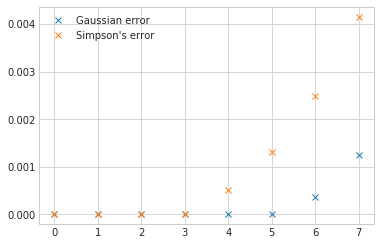

In [32]:
def gaussian_quadrature(f, nodes, weights):
    return np.sum(f(nodes) * weights)

error_gauss = []
error_simp = []
ks = np.arange(8)
for k in ks:
    gauss = gaussian_quadrature(lambda x: x ** k, 
                                nodes,
                                weights)
    simp = simpson(lambda x: x ** k,
                   0,
                   1,
                   4)
    true = 1 / (k+1)
    
    error_gauss.append(np.abs(true - gauss))
    error_simp.append(np.abs(true - simp))

plt.plot(ks, error_gauss, 'x', label='Gaussian error')
plt.plot(ks, error_simp, 'x', label='Simpson\'s error')
plt.legend()

## d)

Explain your findings using the results on the exact integration
  for polynomials up to certain degrees discussed in class.
  
### Answer

The Gaussian is exact until $k = 5$, whereas Simpson's is exact until $k = 3$. This is in agreement with the theorem that Simpson's is exact for up to order $k + 1$ for $k$ even, and that Gaussian quadrature is exact for up to order $2k + 1$ for $k$ even; in these situations, $k = 2$, lining up with the empirical bounds.

# 6. Orthogonal polynomials on $[0,\infty)$

## a)

Find  orthogonal   polynomials  $l_0,l_1,l_2,l_3$   for  the
    unbounded   interval  $[0,\infty)$   with   the  weight   function
    $\omega(x)=\exp(-x)$. They are called *Laguerre polynomials*.
    
### Answer

Since $\int_0^\infty e^{-x} dx = -1 \neq 0$, $l_0 = 1$.

It follows that $l_1 = x - \int_0^\infty xe^{-x} dx \\
= x - 1$,

The rest of the projections can be calculated using Wolfram Alpha:

\begin{align}
&\int_0^\infty x^2(x - 1)e^{-x} dx = 4, \\
& \int_0^\infty x^2 e^{-x} dx = 2 \\
&\implies l_2 = x^2 - 4(x - 1) - 2 \\
& = x^2 - 4x + 2
\end{align}

Since this $l_2$ integrates to $4$, we can divide by $1/2$ to get a norm of $1$: $\frac{1}{2}(x^2 - 4x + 2)$.

\begin{align}
& \frac{1}{2}\int_0^\infty x^3(x^2 - 4x + 2)e^{-x} dx = 18, \\
& \int_0^\infty x^3(x - 1)e^{-x} dx = 18, \\
&\int_0^\infty x^3e^{-x} dx = 6 \\
&\implies l_3 = x^3 - 9(x^2 - 4x + 2) - 18(x-1) - 6 \\
&= x^3 - 9x^2 + 18x - 6
\end{align}

## b)

As these are orthogonal polynomials, they correspond to a
    quadrature rule for weighted integrals on $[0,\infty)$. The
    resulting quadrature points and weight are given in
    Table
    
Verify that for $n=2$, $n=3$, the quadrature nodes $x_i$ are the
roots of the polynomials $l_2(x),l_3(x)$ (up to round-off).

### Answer

#### $n = 2$

In [16]:
roots_2 = np.roots(np.array([1, -4, 2]))
roots_2

array([3.41421356, 0.58578644])

#### $n = 3$

In [17]:
roots_3 = np.roots(np.array([1, -9, 18, -6]))
roots_3

array([6.28994508, 2.29428036, 0.41577456])

### c)

Use the quadrature rules to approximate the integrals
$$
\int_0^\infty \exp(-x) \exp(-x)\, dx \quad\text{ and }\quad \int_0^\infty \exp(-x^2)\, dx.
$$
Note that, to take into account the weight $\omega(x) = \exp(-x)$,
for the first integral $f(x) = \exp(-x)$ and for the second $f(x)
= \exp(-x^2+x)$. Report the errors for $n=2,3,4$ using that the
exact values for the integrals are $1/2$ and $\sqrt{\pi}/2$.

### Answer

In [18]:
def f_1(x):
    return np.exp(-x)

def f_2(x):
    return np.exp(- (x ** 2) + x)

weights_2 = np.array([0.146447, 0.853553])
weights_3 = np.array([0.0103893, 0.278518, 0.711093])

#### $n = 2$, $f(x) = e^{-x}$

In [19]:
approx = (f_1(roots_2) * weights_2).sum()
approx

0.4799639993912404

#### Error

In [20]:
np.abs(0.5 - approx)

0.020036000608759597

#### $n = 2$, $f(x) = e^{-x^2 + x}$

In [21]:
approx = (f_2(roots_2) * weights_2).sum()
approx

1.0879862086156737

#### Error

In [22]:
np.abs(np.sqrt(np.pi) / 2 - approx)

0.2017592831629158

#### $n = 3$,  $f(x) = e^{-x}$

In [23]:
approx = (f_1(roots_3) * weights_3).sum()
approx

0.4973031241508433

#### Error

In [24]:
np.abs(0.5 - approx)

0.002696875849156677

#### $n = 3$, $f(x) = e^{-x^2 + x}$

In [25]:
approx = (f_2(roots_3) * weights_3).sum()
approx

0.920904086444249

#### Error

In [26]:
np.abs(np.sqrt(np.pi) / 2 - approx)

0.034677160991491096